I. Tải dữ liệu

Chú ý: [Splitting API](https://www.tensorflow.org/datasets/splits)

In [1]:
import tensorflow_datasets as tfds

(ds_train, ds_val), ds_info  = tfds.load('mnist', split=['train', 'test'], as_supervised=True, with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


II. Hiển thị vài samples

In [2]:
ds_train

<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [7]:
list(ds_train.take(2))[0][0].shape

TensorShape([28, 28, 1])

In [8]:
list(ds_train.take(2))[0][1]

<tf.Tensor: shape=(), dtype=int64, numpy=4>

Lấy một dữ liệu

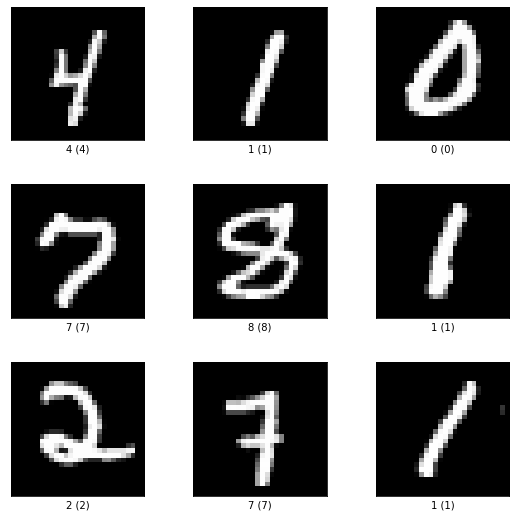

In [9]:
fig = tfds.show_examples(ds_train, ds_info)

III. In ma trận

In [10]:
image, label = list(ds_train.take(1))[0]

In [11]:
image.shape

TensorShape([28, 28, 1])

In [12]:
label.numpy()

4

In [ ]:
ds_train.take(1)

<TakeDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

IV. Chuẩn hóa dữ liệu

Sử dụng hàm map lặp qua các điểm dữ liệu trong tf dataset để tiến hành chuẩn hóa

In [13]:
import tensorflow as tf

def normalize(image, label):

  # image = tf.image.resize(image, (size, size))
  
  # Chuẩn hóa ảnh
  normalized_image = tf.cast(image, tf.float32) / 255.
  
  return normalized_image, label

# Thực hiện trên bộ train

ds_train = ds_train.map(normalize)
ds_train = ds_train.batch(128)
ds_train = ds_train.shuffle(100)

# Thực hiện trên bộ validation

ds_val = ds_val.map(normalize)
ds_val = ds_val.batch(128)
ds_val = ds_val.shuffle(100)


In [15]:
list(ds_train.take(1))

[(<tf.Tensor: shape=(128, 28, 28, 1), dtype=float32, numpy=
  array([[[[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]],
  
          [[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]],
  
          [[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]],
  
          ...,
  
          [[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]],
  
          [[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]],
  
          [[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]]],
  
  
         [[[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]],
  
          [[0.],
           [0.],
           [0.],
           ..

V. Xây dựng mô hình

In [16]:
ds_info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

Lấy số lượng nhãn từ tensorflow dataset infor

In [17]:
num_classes = ds_info.features['label'].num_classes

In [18]:
num_classes

10

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001),
    loss='sparse_categorical_crossentropy',
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(
    ds_train,
    epochs=100,
    validation_data=ds_val,
)

Epoch 1/100
469/469 [==============================] - 9s 12ms/step - loss: 2.1200 - sparse_categorical_accuracy: 0.2701 - val_loss: 1.9027 - val_sparse_categorical_accuracy: 0.4622
Epoch 2/100
469/469 [==============================] - 3s 5ms/step - loss: 1.7559 - sparse_categorical_accuracy: 0.5580 - val_loss: 1.5968 - val_sparse_categorical_accuracy: 0.6503
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 1.5024 - sparse_categorical_accuracy: 0.6801 - val_loss: 1.3807 - val_sparse_categorical_accuracy: 0.7260
Epoch 4/100
469/469 [==============================] - 3s 5ms/step - loss: 1.3210 - sparse_categorical_accuracy: 0.7353 - val_loss: 1.2244 - val_sparse_categorical_accuracy: 0.7632
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 1.1878 - sparse_categorical_accuracy: 0.7657 - val_loss: 1.1082 - val_sparse_categorical_accuracy: 0.7878
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 1.0869 - sparse_cat

In [ ]:
model.save('mymodel.h5')